# Electricity Usage Analytics of all states in USA

## Modeling and Predictive Analysis

### Import Libraries and Packages

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to read data from URL
def read_data_from_URL(url):
    df=pd.read_csv(url)
    return df

In [3]:
data_url='https://raw.githubusercontent.com/nthammadi-uncc/electricity_usage_analysis/main/Data/final_electricity_data.csv'
electricity_analysis_df = read_data_from_URL(data_url)
electricity_analysis_df.head()

,Unnamed: 0,YEAR,STATE,STATE_NAME,ELECTION_RESULT,COAL,GEOTHERMAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,NUCLEAR,...,GEOTHERMAL (BILLION BTU),NATURAL GAS (MCF),OTHER GASES (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE,ELECTRICITY_REVENUE_GROWTH,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
0,0,2001,AK,ALASKA,RED,0.004179,0.0,0.024586,0.020491,0.000000,...,0.0,0.025296,0.000000,0.025745,57363.0,0.067115,0.073740,0.017948,0.006829,0.042801
1,1,2001,AL,ALABAMA,RED,0.534405,0.0,0.152673,0.050564,0.328687,...,0.0,0.053124,0.092146,0.014681,35160.0,0.008211,-0.051074,0.308034,0.423175,0.424627
2,2,2001,AR,ARKANSAS,RED,0.183305,0.0,0.046557,0.014239,0.160037,...,0.0,0.016491,0.000000,0.022423,33339.0,0.059380,0.052058,0.111246,0.076616,0.123935
3,3,2001,AZ,ARIZONA,RED,0.296532,0.0,0.139284,0.067709,0.311006,...,0.0,0.075808,0.000000,0.010010,42704.0,0.045768,0.021301,0.183693,0.060975,0.219712
4,4,2001,CA,CALIFORNIA,BLUE,0.016527,1.0,0.466654,0.588773,0.359680,...,1.0,0.601601,0.366509,0.092433,47262.0,0.278628,0.202604,0.280120,0.037497,0.264764


In [4]:
#drop the first column that is not needed
electricity_analysis_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
electricity_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YEAR                            969 non-null    int64  
 1   STATE                           969 non-null    object 
 2   STATE_NAME                      969 non-null    object 
 3   ELECTION_RESULT                 969 non-null    object 
 4   COAL                            969 non-null    float64
 5   GEOTHERMAL                      969 non-null    float64
 6   HYDROELECTRIC CONVENTIONAL      969 non-null    float64
 7   NATURAL GAS                     969 non-null    float64
 8   NUCLEAR                         969 non-null    float64
 9   OTHER                           969 non-null    float64
 10  OTHER BIOMASS                   969 non-null    float64
 11  OTHER GASES                     969 non-null    float64
 12  PETROLEUM                       969 

In [6]:
electricity_analysis_df.describe()

,YEAR,COAL,GEOTHERMAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,NUCLEAR,OTHER,OTHER BIOMASS,OTHER GASES,PETROLEUM,...,GEOTHERMAL (BILLION BTU),NATURAL GAS (MCF),OTHER GASES (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE,ELECTRICITY_REVENUE_GROWTH,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,2010.000000,0.235309,0.024088,0.070081,0.096533,0.162545,0.084053,0.142285,0.079582,0.068427,...,0.024096,0.097881,0.085005,0.074311,52225.255934,0.038155,0.033997,0.175461,0.182848,0.238502
std,5.480054,0.239628,0.140804,0.163205,0.174422,0.214122,0.157410,0.224192,0.208188,0.166028,...,0.140824,0.174335,0.212022,0.171281,11028.859836,0.059653,0.060683,0.172886,0.223727,0.215389
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,29359.000000,-0.269975,-0.291972,0.000000,0.000000,0.000000
25%,2005.000000,0.025385,0.000000,0.006482,0.008994,0.000000,0.001778,0.008539,0.000000,0.003633,...,0.000000,0.010563,0.000000,0.004248,43974.000000,0.006822,-0.001130,0.051542,0.026142,0.078955
50%,2010.000000,0.188496,0.000000,0.018617,0.035690,0.094581,0.019301,0.040298,0.000000,0.014721,...,0.000000,0.035871,0.000000,0.016621,50704.000000,0.032595,0.029944,0.135925,0.092836,0.197485
75%,2015.000000,0.312076,0.000000,0.045597,0.102388,0.295497,0.117053,0.167358,0.029029,0.053182,...,0.000000,0.103940,0.041364,0.055736,59094.000000,0.060750,0.067018,0.234720,0.259950,0.326277
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,95572.000000,0.377947,0.346392,1.000000,1.000000,1.000000


### Definition of Dataset:

The dataset has 969 rows and 29 features. List of features and their description is below:
<ol>
    <li>YEAR: Year ranging from 2001 to 2019</li>
    <li>STATE: Abbreviation of State</li>
    <li>STATE_NAME: Name of the State</li>
    <li>ELECTION_RESULT: This shows if the state during that year was under Republic(RED) or Democratic(BLUE) government</li>
    <b>Features 5-18 are related to Electricity Generation</b>
    <li>COAL</li>
    <li>GEOTHERMAL</li>
    <li>HYDROELECTRIC CONVENTIONAL</li>
    <li>NATURAL GAS</li>
    <li>NUCLEAR</li>
    <li>OTHER</li>
    <li>OTHER BIOMASS</li>
    <li>OTHER GASES</li>
    <li>PETROLEUM</li>
    <li>PUMPED STORAGE</li>
    <li>SOLAR THERMAL AND PHOTOVOLTAIC</li>
    <li>WIND</li>
    <li>WOOD AND WOOD DERIVED FUELS</li>
    <li>GENERATION_TOTAL: Total Electricity generated in the state during the year through all Energy sources</li>
    <b>Features 19-23 are related to Electricity Consumption</b>
    <li>COAL (SHORT TONS)</li>
    <li>GEOTHERMAL (BILLION BTU)</li>
    <li>NATURAL GAS (MCF)</li>
    <li>OTHER GASES (BILLION BTU)</li>
    <li>PETROLEUM (BARRELS)</li>
    <li>Median Income: Median Income of the state during the year</li>
    <li>PRICE_INFLATION_RATE: Rate at which the price of Electricity has been since the previous year</li>
    <li>ELECTRICITY_REVENUE_GROWTH: Growth of Revenue generated through Electricity</li>
    <b>Features 26-29 are related to Emissions - Carbondioxide, Sulphurdioxide and Nitricoxide in the state through the year</b>
    <li>Carbon_dioxide(MT)</li>
    <li>Sulphur_dioxide(MT)</li>
    <li>Nitric_oxide(MT)</li>
</ol>

## Exploring the variables

<AxesSubplot:xlabel='ELECTION_RESULT', ylabel='count'>

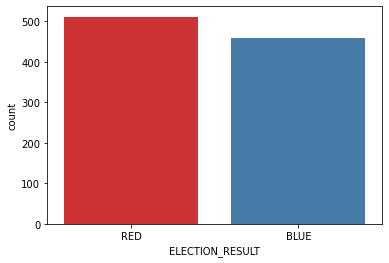

In [7]:
#bar graph of categorical variable - ELECTION_RESULT
sns.countplot(x='ELECTION_RESULT', data=electricity_analysis_df, palette="Set1")

#### Data seems to be almost evenly distributed between Red and Blue states

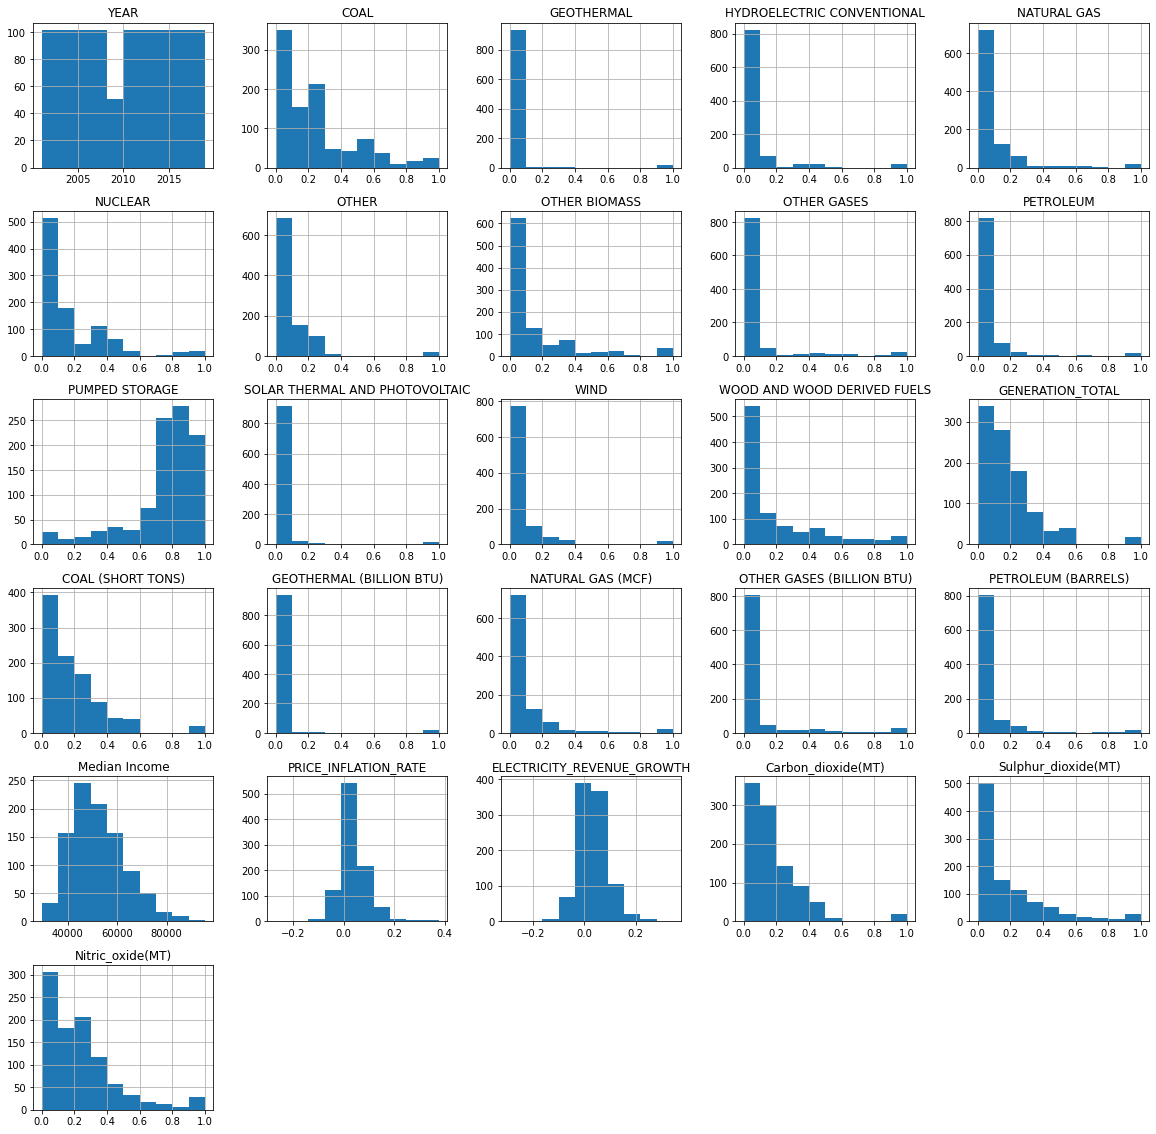

In [8]:
#The graphs shows how the data is distributed for every single attribute of the dataset
plt.rcParams["figure.figsize"] = [20,20]
electricity_analysis_df.hist()
plt.show()

#### We see some of the features are skewed

Text(0.5, 1.0, 'Electricity Generation Distribution - Total Generation')

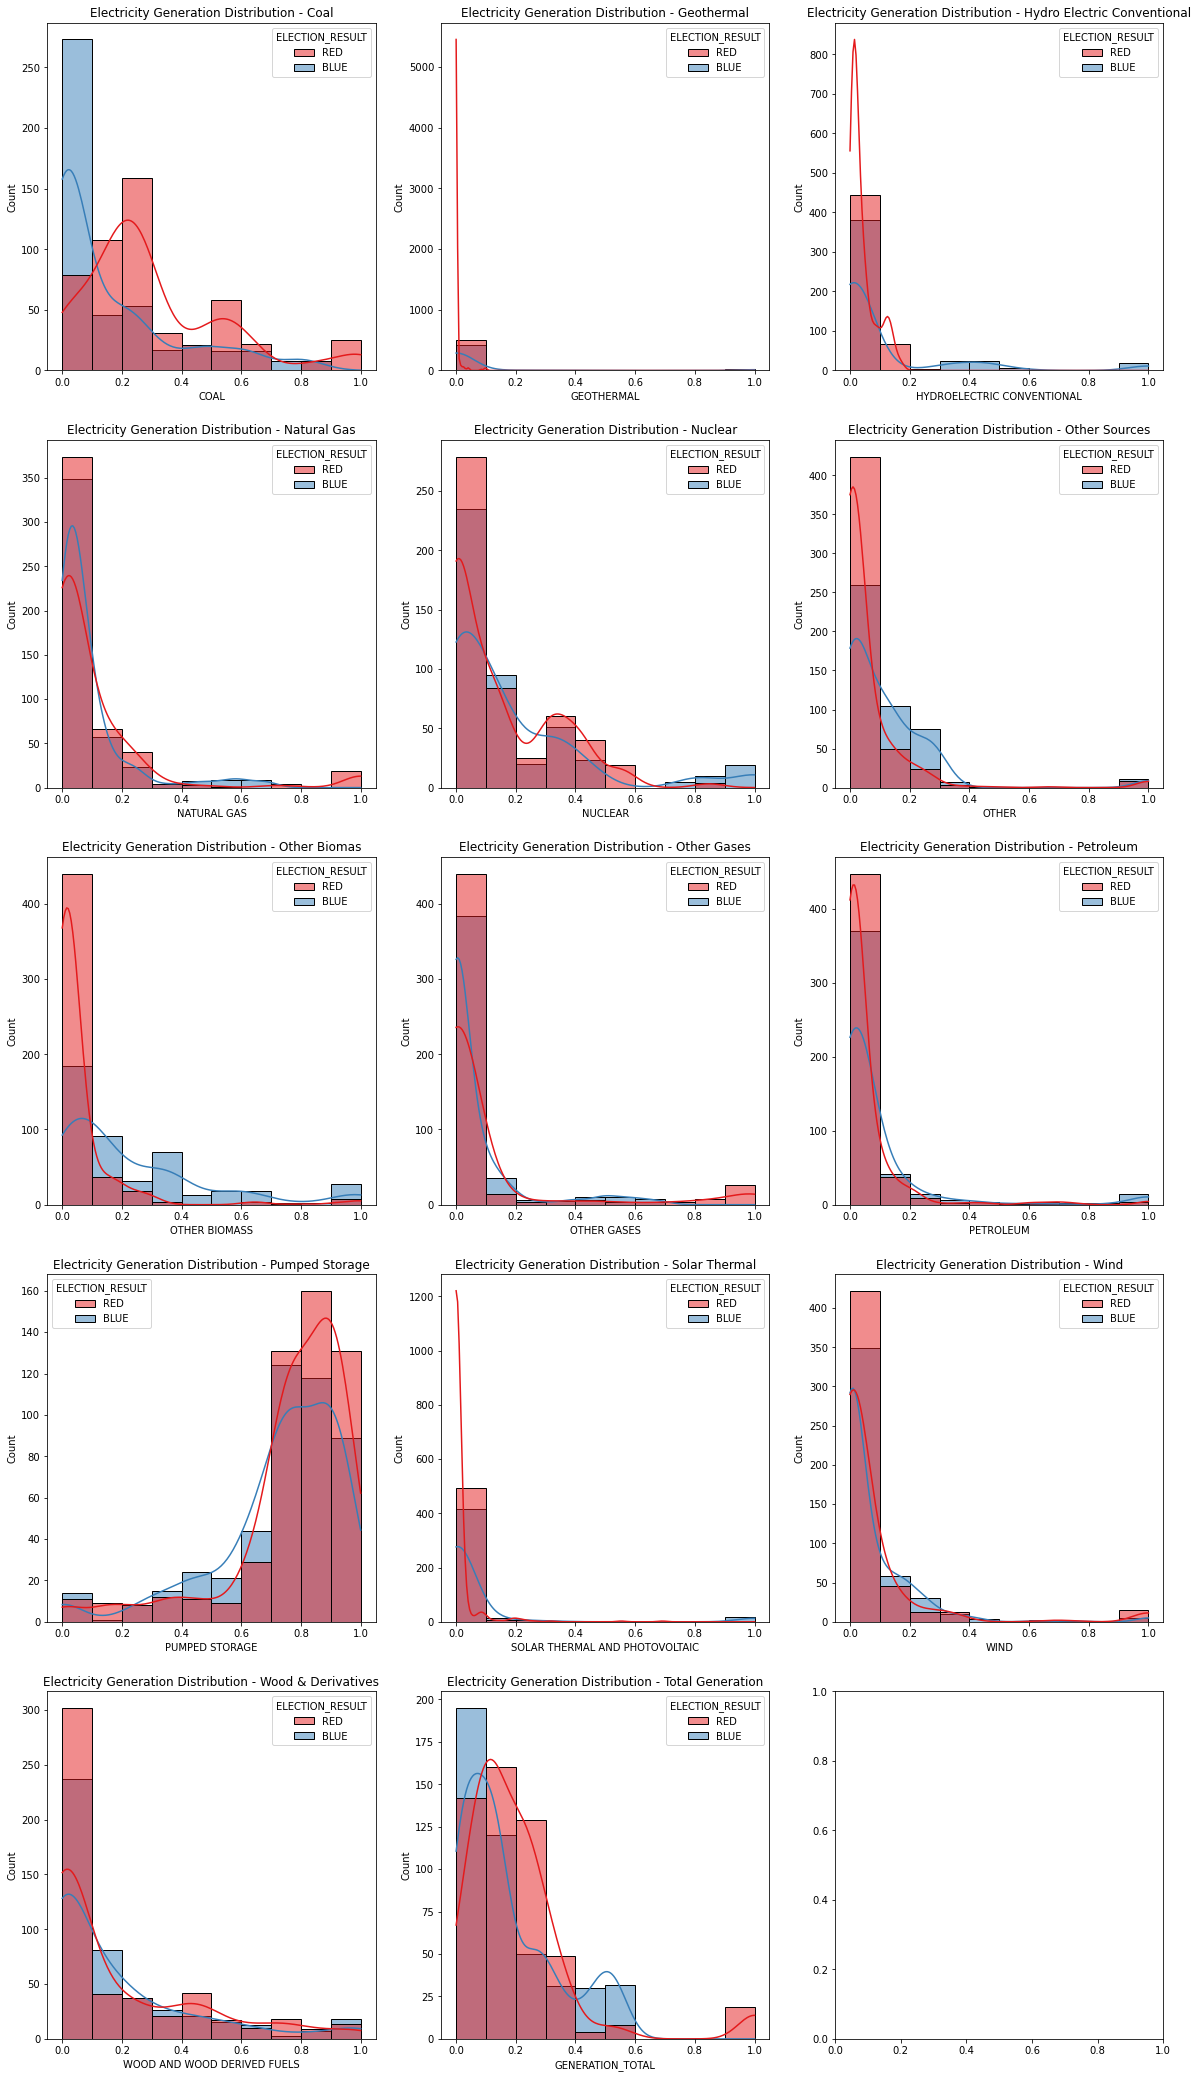

In [21]:
#Create univariate plots for Electricity Generation features
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.5, wspace=None, hspace=None)
sns.histplot(ax=axes[0, 0], data=electricity_analysis_df, x='COAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 0].set_title('Electricity Generation Distribution - Coal')
sns.histplot(ax=axes[0, 1], data=electricity_analysis_df, x='GEOTHERMAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 1].set_title('Electricity Generation Distribution - Geothermal')
sns.histplot(ax=axes[0, 2], data=electricity_analysis_df, x='HYDROELECTRIC CONVENTIONAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 2].set_title('Electricity Generation Distribution - Hydro Electric Conventional')
sns.histplot(ax=axes[1, 0], data=electricity_analysis_df, x='NATURAL GAS', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 0].set_title('Electricity Generation Distribution - Natural Gas')
sns.histplot(ax=axes[1, 1], data=electricity_analysis_df, x='NUCLEAR', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 1].set_title('Electricity Generation Distribution - Nuclear')
sns.histplot(ax=axes[1, 2], data=electricity_analysis_df, x='OTHER', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 2].set_title('Electricity Generation Distribution - Other Sources')
sns.histplot(ax=axes[2, 0], data=electricity_analysis_df, x='OTHER BIOMASS', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[2, 0].set_title('Electricity Generation Distribution - Other Biomas')
sns.histplot(ax=axes[2, 1], data=electricity_analysis_df, x='OTHER GASES', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[2, 1].set_title('Electricity Generation Distribution - Other Gases')
sns.histplot(ax=axes[2, 2], data=electricity_analysis_df, x='PETROLEUM', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[2, 2].set_title('Electricity Generation Distribution - Petroleum')
sns.histplot(ax=axes[3, 0], data=electricity_analysis_df, x='PUMPED STORAGE', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[3, 0].set_title('Electricity Generation Distribution - Pumped Storage')
sns.histplot(ax=axes[3, 1], data=electricity_analysis_df, x='SOLAR THERMAL AND PHOTOVOLTAIC', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[3, 1].set_title('Electricity Generation Distribution - Solar Thermal')
sns.histplot(ax=axes[3, 2], data=electricity_analysis_df, x='WIND', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[3, 2].set_title('Electricity Generation Distribution - Wind')
sns.histplot(ax=axes[4, 0], data=electricity_analysis_df, x='WOOD AND WOOD DERIVED FUELS', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[4, 0].set_title('Electricity Generation Distribution - Wood & Derivatives')
sns.histplot(ax=axes[4, 1], data=electricity_analysis_df, x='GENERATION_TOTAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[4, 1].set_title('Electricity Generation Distribution - Total Generation')

#### We see some trends with Red and Blue states, especially for Electricity generation using coal which is a little more in Red states. We also see blue state adopting Geothermal and Solar electricity generation slightly more than red states. Both have a similar trend towards wood and wooded derived fuels.

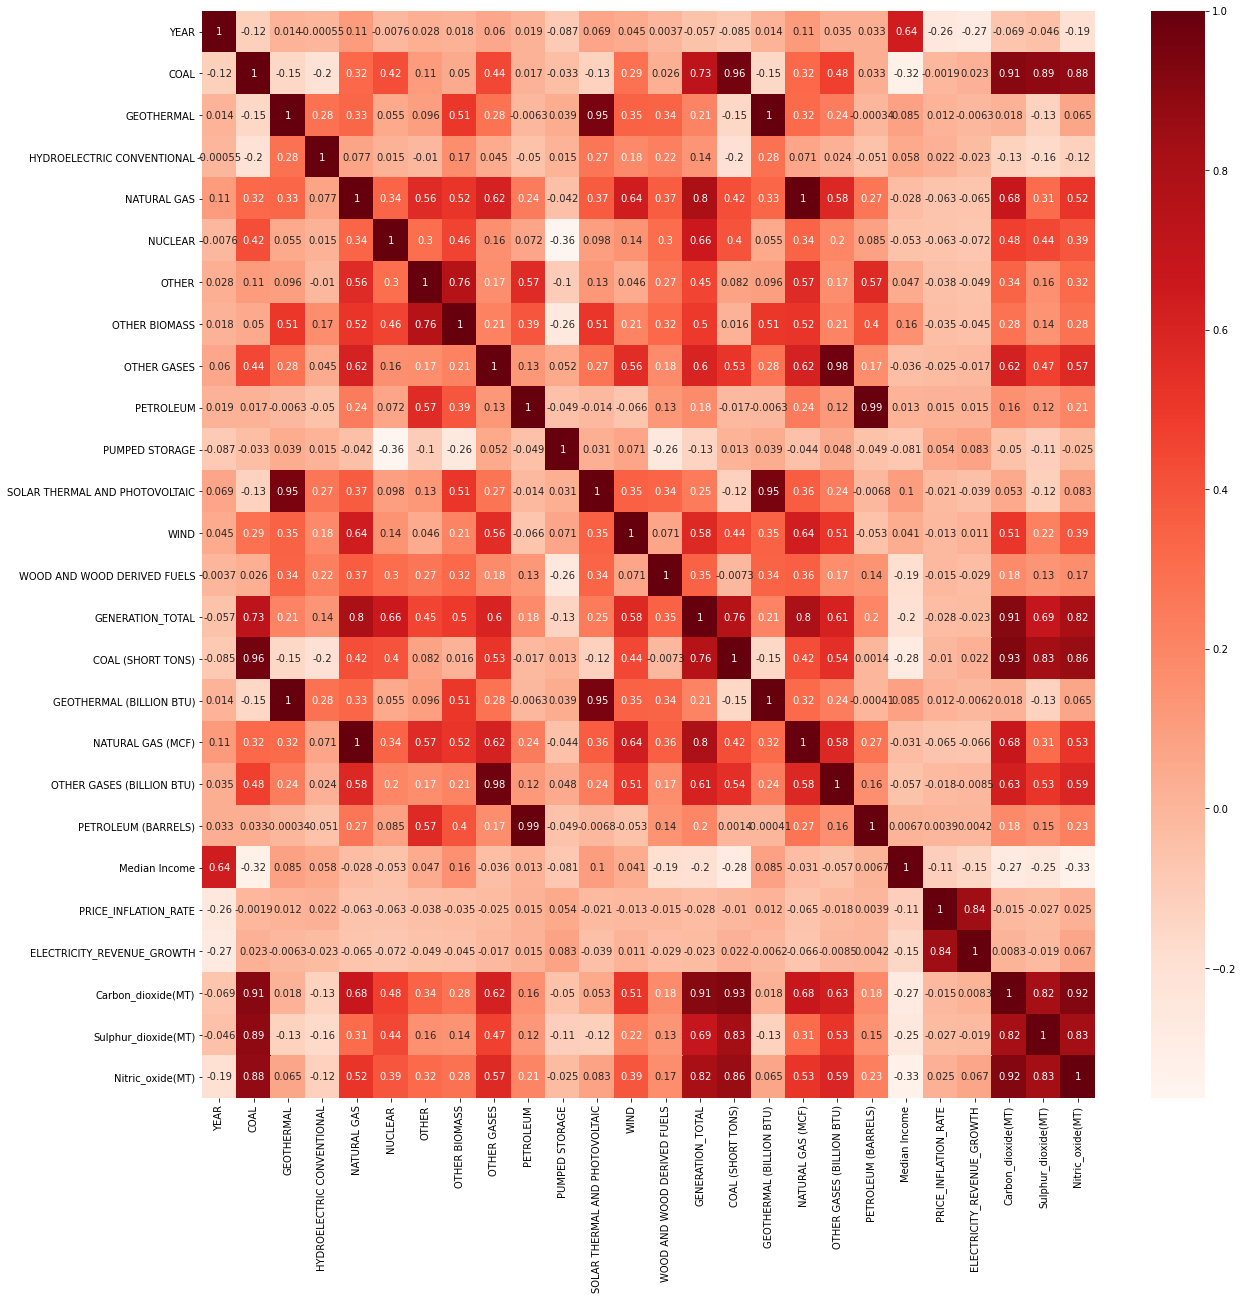

In [9]:
#Generate correlation matrix 
plt.figure(figsize=(20,20))
sns.heatmap(electricity_analysis_df.corr(), annot=True ,cmap='Reds')
plt.show()

### Correlation between variables

We see some strong correlations between variables within the dataset. Some of them are:
<ol>
    <li>Electricity Generation and Consumption using Coal are highly correlated.</li>
    <li>Electricity Generation and Consumption through Coal and Emissions(Carbon dioxide, Sulphur dioxide, Nitric oxide) are highly correlated</li>
    <li>Electricity Generation through Coal, Natural Gas, Nuclear and Other gases are also highly correlated to Generation Total which might indicate that a majority of contribution to Electricity Generation might be through these sources</li>
    <li>Electricity Generation and Consumption using Geothermal, Natural Gas, Other gases and Petroleum sources respectively are highly correlated.</li>
    <li>Electricity Generation through Geothermal and Solar Thermal sources are correlated.</li>
    <li>Electricity Price inflation rate and Revenue growth are highly correlated</li>
    <li>All Emissions(Carbon dioxide, Sulphur dioxide, Nitric oxide) are highly correlated to each other</li>
</ol>

In [ ]:
#pair plot between generation
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT','COAL','GEOTHERMAL','NATURAL GAS', 'OTHER GASES',
 'PETROLEUM',
 'SOLAR THERMAL AND PHOTOVOLTAIC',
 'WIND',
 'WOOD AND WOOD DERIVED FUELS']])

In [ ]:
#pair plot between consumptions
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT','COAL (SHORT TONS)',
 'GEOTHERMAL (BILLION BTU)',
 'NATURAL GAS (MCF)',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM (BARRELS)']])

In [ ]:
#pair plot between generation & consumption
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT','COAL',
 'GEOTHERMAL',
 'NATURAL GAS',
 'OTHER GASES',
 'PETROLEUM',
 'COAL (SHORT TONS)',
 'GEOTHERMAL (BILLION BTU)',
 'NATURAL GAS (MCF)',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM (BARRELS)']])

In [ ]:
#pair plot between generation & price, income, revenue details
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT','COAL',
 'GEOTHERMAL',
 'NATURAL GAS',
 'OTHER GASES',
 'PETROLEUM',
 'Median Income',
 'PRICE_INFLATION_RATE',
 'ELECTRICITY_REVENUE_GROWTH']])

In [ ]:
#pair plot between consumption & emissions
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT',
 'COAL (SHORT TONS)',
 'GEOTHERMAL (BILLION BTU)',
 'NATURAL GAS (MCF)',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM (BARRELS)',
 'Carbon_dioxide(MT)',
 'Sulphur_dioxide(MT)',
 'Nitric_oxide(MT)']])

## Feature Selection using Cross Validation

In [10]:
from sklearn import preprocessing

# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()
# FIT AND TRANSFORM
electricity_analysis_df['RULING_PARTY'] = electricity_analysis_df[['ELECTION_RESULT']].apply(le.fit_transform)
electricity_analysis_df.head()


,YEAR,STATE,STATE_NAME,ELECTION_RESULT,COAL,GEOTHERMAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,NUCLEAR,OTHER,...,NATURAL GAS (MCF),OTHER GASES (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE,ELECTRICITY_REVENUE_GROWTH,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT),RULING_PARTY
0,2001,AK,ALASKA,RED,0.004179,0.0,0.024586,0.020491,0.000000,0.000000,...,0.025296,0.000000,0.025745,57363.0,0.067115,0.073740,0.017948,0.006829,0.042801,1
1,2001,AL,ALABAMA,RED,0.534405,0.0,0.152673,0.050564,0.328687,0.002564,...,0.053124,0.092146,0.014681,35160.0,0.008211,-0.051074,0.308034,0.423175,0.424627,1
2,2001,AR,ARKANSAS,RED,0.183305,0.0,0.046557,0.014239,0.160037,0.000077,...,0.016491,0.000000,0.022423,33339.0,0.059380,0.052058,0.111246,0.076616,0.123935,1
3,2001,AZ,ARIZONA,RED,0.296532,0.0,0.139284,0.067709,0.311006,0.000000,...,0.075808,0.000000,0.010010,42704.0,0.045768,0.021301,0.183693,0.060975,0.219712,1
4,2001,CA,CALIFORNIA,BLUE,0.016527,1.0,0.466654,0.588773,0.359680,0.067076,...,0.601601,0.366509,0.092433,47262.0,0.278628,0.202604,0.280120,0.037497,0.264764,0


In [12]:
#create the X and y for fitting to models
X=electricity_analysis_df[electricity_analysis_df.columns.difference(['ELECTION_RESULT','STATE','STATE_NAME','RULING_PARTY'])]
X.head()

,COAL,COAL (SHORT TONS),Carbon_dioxide(MT),ELECTRICITY_REVENUE_GROWTH,GENERATION_TOTAL,GEOTHERMAL,GEOTHERMAL (BILLION BTU),HYDROELECTRIC CONVENTIONAL,Median Income,NATURAL GAS,...,OTHER GASES (BILLION BTU),PETROLEUM,PETROLEUM (BARRELS),PRICE_INFLATION_RATE,PUMPED STORAGE,SOLAR THERMAL AND PHOTOVOLTAIC,Sulphur_dioxide(MT),WIND,WOOD AND WOOD DERIVED FUELS,YEAR
0,0.004179,0.006284,0.017948,0.073740,0.017775,0.0,0.0,0.024586,57363.0,0.020491,...,0.000000,0.023000,0.025745,0.067115,0.890201,0.000009,0.006829,0.000272,0.000000,2001
1,0.534405,0.358336,0.308034,-0.051074,0.336205,0.0,0.0,0.152673,35160.0,0.050564,...,0.092146,0.010618,0.014681,0.008211,0.890201,0.000009,0.423175,0.000000,1.000000,2001
2,0.183305,0.159572,0.111246,0.052058,0.126374,0.0,0.0,0.046557,33339.0,0.014239,...,0.000000,0.021581,0.022423,0.059380,0.890201,0.000009,0.076616,0.000000,0.360643,2001
3,0.296532,0.214149,0.183693,0.021301,0.241070,0.0,0.0,0.139284,42704.0,0.067709,...,0.000000,0.007652,0.010010,0.045768,1.000000,0.000911,0.060975,0.000000,0.000000,2001
4,0.016527,0.010245,0.280120,0.202604,0.532875,1.0,1.0,0.466654,47262.0,0.588773,...,0.366509,0.075196,0.092433,0.278628,0.751236,1.000000,0.037497,1.000000,0.796638,2001


In [13]:
y=electricity_analysis_df['RULING_PARTY']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: RULING_PARTY, dtype: int64

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, y)

# summarize scores
set_printoptions(formatter={'float_kind':'{:f}'.format}, precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[95.189221 96.541346 55.546302 6.737162 7.478589 26.389920 26.423750
 36.329001 156.573473 1.885263 2.504102 6.474787 60.223794 35.846417
 179.656256 5.858988 4.081194 12.601617 11.096839 1.931661 9.374230
 22.286290 30.682335 0.003355 0.087319 1.609120]
[[0.004179 0.006284 57363.000000 0.042801 0.000000]
 [0.534405 0.358336 35160.000000 0.424627 0.008214]
 [0.183305 0.159572 33339.000000 0.123935 0.003506]
 [0.296532 0.214149 42704.000000 0.219712 0.018702]
 [0.016527 0.010245 47262.000000 0.264764 1.000000]]


In [20]:
X.columns.to_list()

['COAL',
 'COAL (SHORT TONS)',
 'Carbon_dioxide(MT)',
 'ELECTRICITY_REVENUE_GROWTH',
 'GENERATION_TOTAL',
 'GEOTHERMAL',
 'GEOTHERMAL (BILLION BTU)',
 'HYDROELECTRIC CONVENTIONAL',
 'Median Income',
 'NATURAL GAS',
 'NATURAL GAS (MCF)',
 'NUCLEAR',
 'Nitric_oxide(MT)',
 'OTHER',
 'OTHER BIOMASS',
 'OTHER GASES',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM',
 'PETROLEUM (BARRELS)',
 'PRICE_INFLATION_RATE',
 'PUMPED STORAGE',
 'SOLAR THERMAL AND PHOTOVOLTAIC',
 'Sulphur_dioxide(MT)',
 'WIND',
 'WOOD AND WOOD DERIVED FUELS',
 'YEAR']

#### Using SelectKBest approach with ANOVA F-value method, the best features are related to indexes: 0, 1, 2, 8, 12, 14 which are COAL,  COAL (SHORT TONS), Carbon_dioxide(MT), Median Income, Nitric_oxide(MT), OTHER BIOMASS

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 2  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    #cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)


In [ ]:
rfecv.fit(X,y)
print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()